# Part 1- plain vanilla gradient descent

In [91]:
import os
import pandas as pd
import numpy as np
import gd    #import the class set before in the same directory 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time
%matplotlib inline

define the funciton:
          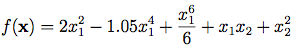
          
        
      　


The function is usually evaluated on the square xi ∈ [-5, 5], for all i = 1, 2. 

Global Minimum: 

In [92]:
def fn_loss(x1,x2):
    return 2*x1**2 - 1.05*x1**4 + (x1**6)/6 +x1*x2 + x2**2

Define the function for gradient at x1 and x2

In [93]:
def fn_grad1(x1,x2):
    return 4*x1 - 4*(1.05)*x1**3 + x1**5 + x2

def fn_grad2(x1,x2):
    return x1 + 2*x2

Plot the function in 3D

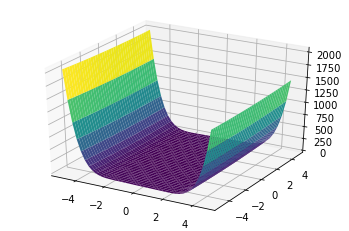

In [94]:
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
x1, x2 = np.meshgrid(x1, x2)
Z = fn_loss(x1,x2)
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');


Plot it again but change range to see it in specific area. So it is clear to see there are 3 humps

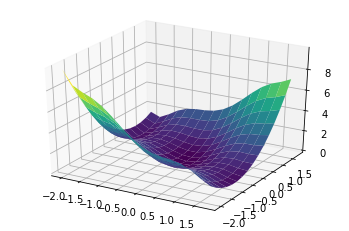

In [95]:
x1 = np.arange(-2, 2, 0.25)
x2 = np.arange(-2, 2, 0.25)
x1, x2 = np.meshgrid(x1, x2)
Z = fn_loss(x1,x2)
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

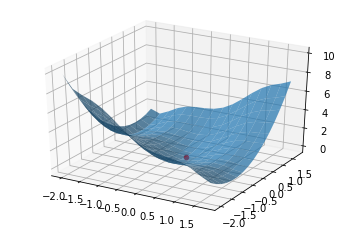

In [96]:
x1 = np.arange(-2, 2, 0.25)
x2 = np.arange(-2, 2, 0.25)
x1, x2 = np.meshgrid(x1, x2)
Z = fn_loss(x1,x2)
ax = plt.axes(projection='3d')

#ax.invert_zaxis()
ax.plot_surface(x1,x2,Z,alpha=0.7)
ax.scatter(0, 0, 0,s=20,c='r')
         

# start to find the global minimum

In [97]:
solver = gd.gd_pv_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)

In [98]:
solver.vanilla_gd(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.001, tol = 1e-5)

Converged in 1662 steps.  Loss fn 7.921638881010898e-07 achieved by x1 = 0.0004450179573012562 ,x2 = 0.0004450179573012562


Result: loss_fun is nearly equal to 0 when x1 and x2 are close to 0

(1663,)


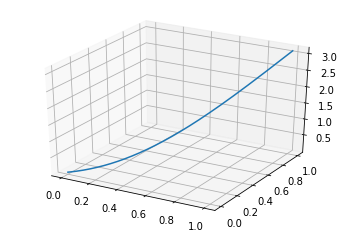

In [99]:
x1=solver.x1_path
x2=solver.x2_path

zz= fn_loss(solver.x1_path,solver.x2_path)
print(zz.shape)
ax = plt.axes(projection='3d')
ax.plot(x1, x2, zz)

# change eta

In [100]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    solver = gd.gd_pv_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
    start = time.time()
    solver.vanilla_gd(x1_init = 1,x2_init = 1, n_iter = 2000, eta = i, tol = 1e-5)
    end = time.time()
    print('running time:',end - start)

Converged in 1662 steps.  Loss fn 7.921638881010898e-07 achieved by x1 = 0.0004450179573012562 ,x2 = 0.0004450179573012562
running time: 0.015191316604614258
Converged in 330 steps.  Loss fn 7.806651586251466e-07 achieved by x1 = 0.00044177630046764735 ,x2 = 0.00044177630046764735
running time: 0.002827882766723633
Converged in 164 steps.  Loss fn 7.271337863214712e-07 achieved by x1 = 0.0004263607102615566 ,x2 = 0.0004263607102615566
running time: 0.001394033432006836
Converged in 30 steps.  Loss fn 7.201379119020657e-07 achieved by x1 = 0.0004243047094763096 ,x2 = 0.0004243047094763096
running time: 0.0005283355712890625
Converged in 13 steps.  Loss fn 7.977630758067744e-07 achieved by x1 = 0.0004465879301918685 ,x2 = 0.0004465879301918685
running time: 0.0003483295440673828


In [101]:
#if change initial value of x1 x2

In [102]:
solver = gd.gd_pv_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.vanilla_gd(x1_init = -2,x2_init = 2, n_iter = 2000, eta = 0.005, tol = 1e-5)

Converged in 69 steps.  Loss fn 1.9103471011713964 achieved by x1 = -1.833583799392227 ,x2 = 2.166416200607775


In [106]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    solver = gd.gd_pv_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
    solver.vanilla_gd(x1_init = -2,x2_init = 2, n_iter = 2000, eta = i, tol = 1e-5)

Converged in 360 steps.  Loss fn 1.9103438490854887 achieved by x1 = -1.833585101770303 ,x2 = 2.1664148982296982
Converged in 69 steps.  Loss fn 1.9103471011713964 achieved by x1 = -1.833583799392227 ,x2 = 2.166416200607775
Converged in 33 steps.  Loss fn 1.9103776862423496 achieved by x1 = -1.833571551581822 ,x2 = 2.166428448418179
Converged in 4 steps.  Loss fn 1.9106809237349824 achieved by x1 = -1.8334501918564687 ,x2 = 2.166549808143531
Converged in 58 steps.  Loss fn 1.9103423582422807 achieved by x1 = -1.8335856988202974 ,x2 = 2.1664143011797043


In [107]:
#we can see that after change iniital value, we can not find the global minimum. Also, with differnt eta,  zig-zag behaviour shows.